In [1]:
import pandas as pd
import geopandas as gpd
import numpy as np
import folium
import matplotlib

In [2]:
pov_df = pd.read_csv('pov-data.csv')

In [3]:
##Read geojson
tracts = gpd.read_file("./detroit-tracts.geojson")
tracts.head()

,funcstat_10,statefp_10,countyfp_10,shape_area,awater_10,shape_leng,geoid_10,name_10,intptlon_10,aland_10,tractce_10,namelsad_10,intptlat_10,mtfcc_10,geometry
0,S,26,163,12036757.4592,0,14666.8015975,26163524800,5248,-083.1615912,1118325,524800,Census Tract 5248,+42.2630997,G5020,(POLYGON ((-83.15892563126194 42.2573660623704...
1,S,26,163,18215569.6227,0,22567.2276178,26163521900,5219,-083.0805337,1692449,521900,Census Tract 5219,+42.3503993,G5020,"(POLYGON ((-83.076771397333 42.34364133175898,..."
2,S,26,163,2420653.71775,0,6800.03667832,26163521800,5218,-083.0712523,224907,521800,Census Tract 5218,+42.3461214,G5020,(POLYGON ((-83.07156338705664 42.3432303356932...
3,S,26,163,16229879.1339,0,18245.5355169,26163521500,5215,-083.0763920,1507941,521500,Census Tract 5215,+42.3368603,G5020,(POLYGON ((-83.08486342935494 42.3320142943701...
4,S,26,163,14052351.1584,0,18164.8102125,26163521400,5214,-083.0730165,1305626,521400,Census Tract 5214,+42.3305838,G5020,(POLYGON ((-83.0852754315236 42.33146429315667...


In [16]:
##drop unnecessary columns and rename to tracts
tracts = tracts.drop(tracts.columns[np.r_[0, 1, 2, 5, 7, 8, 11, 12, 13]], axis=1)
tracts = tracts.rename({'tractce_10':'tract'}, axis=1)
tracts.head()

,shape_area,awater_10,geoid_10,aland_10,tract,geometry
0,12036757.4592,0,26163524800,1118325,524800,(POLYGON ((-83.15892563126194 42.2573660623704...
1,18215569.6227,0,26163521900,1692449,521900,"(POLYGON ((-83.076771397333 42.34364133175898,..."
2,2420653.71775,0,26163521800,224907,521800,(POLYGON ((-83.07156338705664 42.3432303356932...
3,16229879.1339,0,26163521500,1507941,521500,(POLYGON ((-83.08486342935494 42.3320142943701...
4,14052351.1584,0,26163521400,1305626,521400,(POLYGON ((-83.0852754315236 42.33146429315667...


In [17]:
tracts['shape_area'] = tracts['shape_area'].astype(np.float64)
tracts['awater_10'] = tracts['awater_10'].astype(np.int64)
tracts['geoid_10'] = tracts['geoid_10'].astype(np.int64)
tracts['aland_10'] = tracts['aland_10'].astype(np.int64)
tracts['tract'] = tracts['tract'].astype(np.int64)

In [18]:
tracts.head()

,shape_area,awater_10,geoid_10,aland_10,tract,geometry
0,1.203676e+07,0,26163524800,1118325,524800,(POLYGON ((-83.15892563126194 42.2573660623704...
1,1.821557e+07,0,26163521900,1692449,521900,"(POLYGON ((-83.076771397333 42.34364133175898,..."
2,2.420654e+06,0,26163521800,224907,521800,(POLYGON ((-83.07156338705664 42.3432303356932...
3,1.622988e+07,0,26163521500,1507941,521500,(POLYGON ((-83.08486342935494 42.3320142943701...
4,1.405235e+07,0,26163521400,1305626,521400,(POLYGON ((-83.0852754315236 42.33146429315667...


In [19]:
##joining data. Need to make tract column name same in both datasets first
tracts = tracts.merge(pov_df, how='inner', on='tract')


In [20]:
tracts

,shape_area,awater_10,geoid_10,aland_10,tract,geometry,B01003_001E,B17001_002E,NAME,county,state
0,1.203676e+07,0,26163524800,1118325,524800,(POLYGON ((-83.15892563126194 42.2573660623704...,2994,1608,"Census Tract 5248, Wayne County, Michigan",163,26
1,1.821557e+07,0,26163521900,1692449,521900,"(POLYGON ((-83.076771397333 42.34364133175898,...",3040,1477,"Census Tract 5219, Wayne County, Michigan",163,26
2,2.420654e+06,0,26163521800,224907,521800,(POLYGON ((-83.07156338705664 42.3432303356932...,1436,686,"Census Tract 5218, Wayne County, Michigan",163,26
3,1.622988e+07,0,26163521500,1507941,521500,(POLYGON ((-83.08486342935494 42.3320142943701...,1577,824,"Census Tract 5215, Wayne County, Michigan",163,26
4,1.405235e+07,0,26163521400,1305626,521400,(POLYGON ((-83.0852754315236 42.33146429315667...,1350,459,"Census Tract 5214, Wayne County, Michigan",163,26
5,1.043117e+07,0,26163521300,969178,521300,(POLYGON ((-83.09563443747663 42.3416633102971...,835,268,"Census Tract 5213, Wayne County, Michigan",163,26
6,1.722842e+07,117811,26163521100,1600031,521100,(POLYGON ((-83.07559288676109 42.3142954928091...,2287,897,"Census Tract 5211, Wayne County, Michigan",163,26
7,1.163386e+07,379735,26163985300,1105371,985300,(POLYGON ((-83.06557863561882 42.3200523701491...,86,42,"Census Tract 9853, Wayne County, Michigan",163,26
8,1.379458e+07,686823,26163520800,1348294,520800,(POLYGON ((-83.04273017389596 42.3266959140709...,1611,202,"Census Tract 5208, Wayne County, Michigan",163,26
9,8.259743e+06,0,26163520700,767428,520700,(POLYGON ((-83.06214938422526 42.3325763158841...,2371,1001,"Census Tract 5207, Wayne County, Michigan",163,26


In [21]:
#drop rows 296 to 309
tracts = tracts.drop(tracts.index[296: 310])

In [22]:
tracts

,shape_area,awater_10,geoid_10,aland_10,tract,geometry,B01003_001E,B17001_002E,NAME,county,state
0,1.203676e+07,0,26163524800,1118325,524800,(POLYGON ((-83.15892563126194 42.2573660623704...,2994,1608,"Census Tract 5248, Wayne County, Michigan",163,26
1,1.821557e+07,0,26163521900,1692449,521900,"(POLYGON ((-83.076771397333 42.34364133175898,...",3040,1477,"Census Tract 5219, Wayne County, Michigan",163,26
2,2.420654e+06,0,26163521800,224907,521800,(POLYGON ((-83.07156338705664 42.3432303356932...,1436,686,"Census Tract 5218, Wayne County, Michigan",163,26
3,1.622988e+07,0,26163521500,1507941,521500,(POLYGON ((-83.08486342935494 42.3320142943701...,1577,824,"Census Tract 5215, Wayne County, Michigan",163,26
4,1.405235e+07,0,26163521400,1305626,521400,(POLYGON ((-83.0852754315236 42.33146429315667...,1350,459,"Census Tract 5214, Wayne County, Michigan",163,26
5,1.043117e+07,0,26163521300,969178,521300,(POLYGON ((-83.09563443747663 42.3416633102971...,835,268,"Census Tract 5213, Wayne County, Michigan",163,26
6,1.722842e+07,117811,26163521100,1600031,521100,(POLYGON ((-83.07559288676109 42.3142954928091...,2287,897,"Census Tract 5211, Wayne County, Michigan",163,26
7,1.163386e+07,379735,26163985300,1105371,985300,(POLYGON ((-83.06557863561882 42.3200523701491...,86,42,"Census Tract 9853, Wayne County, Michigan",163,26
8,1.379458e+07,686823,26163520800,1348294,520800,(POLYGON ((-83.04273017389596 42.3266959140709...,1611,202,"Census Tract 5208, Wayne County, Michigan",163,26
9,8.259743e+06,0,26163520700,767428,520700,(POLYGON ((-83.06214938422526 42.3325763158841...,2371,1001,"Census Tract 5207, Wayne County, Michigan",163,26


In [23]:
##tracts.to_file('tracts-joined.geojson', driver='GeoJSON')

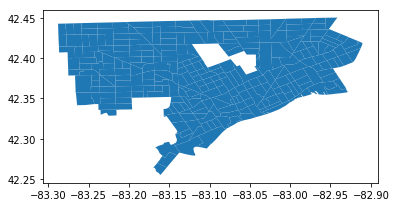

In [24]:
tracts.plot();

In [25]:
tracts['pov_rate'] = tracts['B17001_002E'] / tracts['B01003_001E']
tracts

,shape_area,awater_10,geoid_10,aland_10,tract,geometry,B01003_001E,B17001_002E,NAME,county,state,pov_rate
0,1.203676e+07,0,26163524800,1118325,524800,(POLYGON ((-83.15892563126194 42.2573660623704...,2994,1608,"Census Tract 5248, Wayne County, Michigan",163,26,0.537074
1,1.821557e+07,0,26163521900,1692449,521900,"(POLYGON ((-83.076771397333 42.34364133175898,...",3040,1477,"Census Tract 5219, Wayne County, Michigan",163,26,0.485855
2,2.420654e+06,0,26163521800,224907,521800,(POLYGON ((-83.07156338705664 42.3432303356932...,1436,686,"Census Tract 5218, Wayne County, Michigan",163,26,0.477716
3,1.622988e+07,0,26163521500,1507941,521500,(POLYGON ((-83.08486342935494 42.3320142943701...,1577,824,"Census Tract 5215, Wayne County, Michigan",163,26,0.522511
4,1.405235e+07,0,26163521400,1305626,521400,(POLYGON ((-83.0852754315236 42.33146429315667...,1350,459,"Census Tract 5214, Wayne County, Michigan",163,26,0.340000
5,1.043117e+07,0,26163521300,969178,521300,(POLYGON ((-83.09563443747663 42.3416633102971...,835,268,"Census Tract 5213, Wayne County, Michigan",163,26,0.320958
6,1.722842e+07,117811,26163521100,1600031,521100,(POLYGON ((-83.07559288676109 42.3142954928091...,2287,897,"Census Tract 5211, Wayne County, Michigan",163,26,0.392217
7,1.163386e+07,379735,26163985300,1105371,985300,(POLYGON ((-83.06557863561882 42.3200523701491...,86,42,"Census Tract 9853, Wayne County, Michigan",163,26,0.488372
8,1.379458e+07,686823,26163520800,1348294,520800,(POLYGON ((-83.04273017389596 42.3266959140709...,1611,202,"Census Tract 5208, Wayne County, Michigan",163,26,0.125388
9,8.259743e+06,0,26163520700,767428,520700,(POLYGON ((-83.06214938422526 42.3325763158841...,2371,1001,"Census Tract 5207, Wayne County, Michigan",163,26,0.422185


In [1]:
tracts.to_file('pov-rate.geojson', driver='GeoJSON')

NameError: name 'tracts' is not defined